# Deep Vision
___

**Author** : Aman Hussain  
**Email** : aman@amandavinci.me  
**Description** : Classifying images of dogs and cats by finetuning the VGG16 model

## Import Libraries

#### Scientific Computing Stack

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Custom Packages

In [2]:
import os, json

from helper import utils
from helper.utils import plots

from helper import vgg16
from helper.vgg16 import Vgg16

Using TensorFlow backend.


## Declaring paths & global parameters

The path to the dataset is defined here. It will point to the sample folder which contains lesser number of images for quick and iterative training on the local machine. For the final training, on the cloud we must change the path to the one commented out below.

In [3]:
path = '../data/dogscats/sample/'
# path = '../data/dogscats/'

The default batchsize for training and validation purposes

In [4]:
batchsize = 64

## Data Exploration

Instantiating the VGG16 class which implements the required utility methods

In [5]:
vgg = Vgg16()

Getting the training and validation batches

In [6]:
batches = vgg.get_batches(path+'train', batch_size=batchsize)
val_batches = vgg.get_batches(path+'valid', batch_size=batchsize)

Found 12 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


Visualizing the images, only if we are exploring the samples

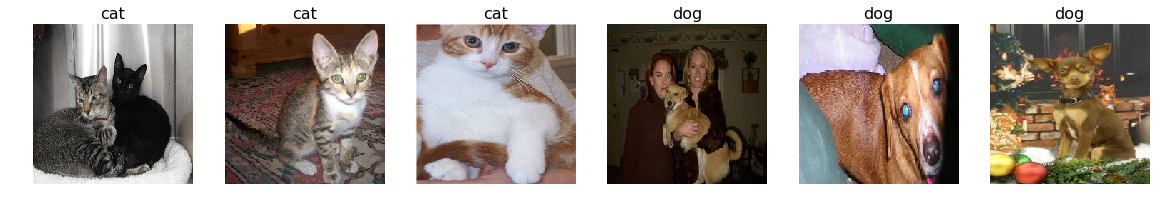

In [7]:
if path == '../data/dogscats/sample/':
    imgs, labels = next(batches)
    val_imgs, val_labels = next(val_batches)
    labels = ['dog' if i[0]==0 else 'cat' for i in labels]
    val_labels = ['dog' if i[0]==0 else 'cat' for i in val_labels]
    plots(val_imgs, figsize=(20,10), titles=val_labels)

## Finetuning

In [8]:
vgg.finetune(batches)

In [9]:
%%time
vgg.fit(batches, val_batches, nb_epoch=5)

Epoch 1/5
12/12 [==============================] - 45s - loss: 0.9167 - acc: 0.5833 - val_loss: 0.6989 - val_acc: 0.6667
Epoch 2/5
12/12 [==============================] - 44s - loss: 0.6737 - acc: 0.8333 - val_loss: 0.6349 - val_acc: 0.5000
Epoch 3/5
12/12 [==============================] - 44s - loss: 1.1377 - acc: 0.6667 - val_loss: 0.5727 - val_acc: 0.6667
Epoch 4/5
12/12 [==============================] - 43s - loss: 0.3035 - acc: 0.9167 - val_loss: 0.5468 - val_acc: 0.8333
Epoch 5/5
12/12 [==============================] - 42s - loss: 0.3697 - acc: 0.8333 - val_loss: 0.5073 - val_acc: 0.6667
CPU times: user 12min 2s, sys: 13.7 s, total: 12min 16s
Wall time: 3min 40s


## Model Testing

Due to the quirkiness of the ImageDataGenerator.flow_from_directory() used by vgg.get_batches(), we have to make a sub directory under test directory by the name 'subdir_for_keras_ImageDataGenerator'.

In [10]:
batch_size = len(os.listdir(path+'test'+'/subdir_for_keras_ImageDataGenerator'))

With the class_mode set to None, it will return only the batch of images without labels

In [11]:
testbatch = vgg.get_batches(path+'test', shuffle=False, batch_size=batch_size, class_mode=None)

Found 6 images belonging to 1 classes.


In [12]:
test_imgs = next(testbatch) 

Here,we visualize the test images

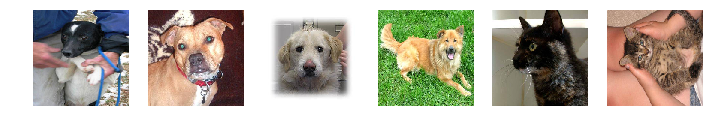

In [13]:
if path == '../data/dogscats/sample/':
    plots(test_imgs)

Here, we make the predictions using our trained model

In [14]:
%%time
probab, prediction, prediction_labels = vgg.predict(test_imgs, details = True)

CPU times: user 47.5 s, sys: 748 ms, total: 48.2 s
Wall time: 13.3 s


## Results

Preparing to save the predictions as submissions to the Kaggle competetion

In [15]:
labels = [str(label) for label in prediction]
labels.insert(0, 'label')
index = [str(i) for i in range(1, batch_size+1)]
index.insert(0, 'id')

In [16]:
submission_array = np.vstack((index, labels)).T.astype('str')

Saving the array as a CSV

In [17]:
np.savetxt(path+'submissions/submission.csv', submission_array, delimiter=",", fmt='%1s')

___